In [2]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)

matplotlib.rcParams["axes.unicode_minus"] = False

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn

w[0]: 0.393906  b: -0.031804


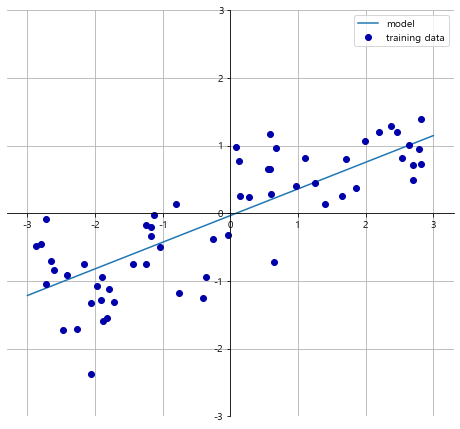

In [5]:
mglearn.plots.plot_linear_regression_wave()

In [11]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
X = boston["data"]
y = boston["target"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

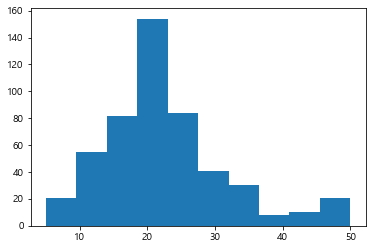

In [17]:
plt.hist(y)

In [18]:
model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

In [59]:
result = {"실제값": y_test, "예측값": pred, "오차": y_test - pred}
result_df = pd.DataFrame(result)
result_df

,실제값,예측값,오차
0,23.6,28.838854,-5.238854
1,32.4,36.007833,-3.607833
2,13.6,15.083248,-1.483248
3,22.8,25.230909,-2.430909
4,16.1,18.878641,-2.778641
...,...,...,...
122,8.8,3.284209,5.515791
123,19.2,23.798796,-4.598796
124,25.3,25.733299,-0.433299
125,20.4,23.048156,-2.648156


In [60]:
result_df["오차제곱"] = (y_test - pred)**2
result_df["오차절대값"] = abs(y_test - pred)
result_df

,실제값,예측값,오차,오차제곱,오차절대값
0,23.6,28.838854,-5.238854,27.445587,5.238854
1,32.4,36.007833,-3.607833,13.016458,3.607833
2,13.6,15.083248,-1.483248,2.200023,1.483248
3,22.8,25.230909,-2.430909,5.909318,2.430909
4,16.1,18.878641,-2.778641,7.720844,2.778641
...,...,...,...,...,...
122,8.8,3.284209,5.515791,30.423951,5.515791
123,19.2,23.798796,-4.598796,21.148926,4.598796
124,25.3,25.733299,-0.433299,0.187748,0.433299
125,20.4,23.048156,-2.648156,7.012731,2.648156


In [61]:
print(result_df["오차제곱"].sum(axis=0)/ len(result_df["오차제곱"]))
print(result_df["오차제곱"].mean())
print("\n")

print(result_df["오차절대값"].sum(axis=0) / len(result_df["오차절대값"]))
print(result_df["오차절대값"].mean())

22.098694827098036
22.098694827098036


3.060939595437034
3.060939595437034


In [62]:
print("RMSE Score : ", np.sqrt(result_df["오차제곱"].mean()))

RMSE Score :  4.700924890603766


In [63]:
# RMSLE 값
# 한 데이터의 예측값이 -6 이므로, 전체 데이터에 +7을 적용하여 양수변환 후 로그 적용
result_df["로그 제곱 오차"] = (np.log(y_test + 7) - np.log(pred + 7))**2
np.sqrt(result_df["로그 제곱 오차"].mean())

0.6067922649179092

In [70]:
# 선형모델 - linear model

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

In [82]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston["target"] = pd.DataFrame(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [87]:
X = df_boston["INDUS"]
y = df_boston["target"]

X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)

print("학습 데이터셋 : ", lr_model.score(X_train, y_train))
print("테스트 데이터셋 : ", lr_model.score(X_test, y_test))

학습 데이터셋 :  0.2186736844495044
테스트 데이터셋 :  0.265466592031395


In [89]:
lr_model.coef_, lr_model.intercept_

(array([[-0.63414969]]), array([29.95964339]))

In [91]:
12 + 11 + 10 + 9 + 8 + 7 + 6 + 5 + 4 + 3 + 2 + 1 # 2차원

91

In [92]:
13 # 2차원

104

In [ ]:
13 # 1차원

In [93]:
X = df_boston.loc[:, "CRIM":"LSTAT"]
y = boston["target"]

X.shape

(506, 13)

In [96]:
normalize_X = MinMaxScaler().fit_transform(X)
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X)
ex_X.shape

(506, 104)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("학습 셋 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 셋 점수 : {:.2f}".format(lr.score(X_test, y_test)))

학습 셋 점수 : 0.94
테스트 셋 점수 : 0.78


In [101]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print("학습셋 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트셋 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print("학습셋 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트셋 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

학습셋 점수 : 0.89
테스트셋 점수 : 0.80
학습셋 점수 : 0.94
테스트셋 점수 : 0.81


C:\Users\HYUNJUN\anaconda3\envs\likelion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [103]:
# lasso 모델의 가중치 개수 with alpha 0.01

len(lasso.coef_)

104

In [109]:
lasso_test = Lasso(alpha=2).fit(X_train, y_train)
ridge_test = Ridge(alpha=2).fit(X_train, y_train)

print(len(lasso_test.coef_))
print(len(ridge_test.coef_))

104
104


[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0.
 -0. -0.  0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.  0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0.]
